137.93472564999422
-19.717010812044183


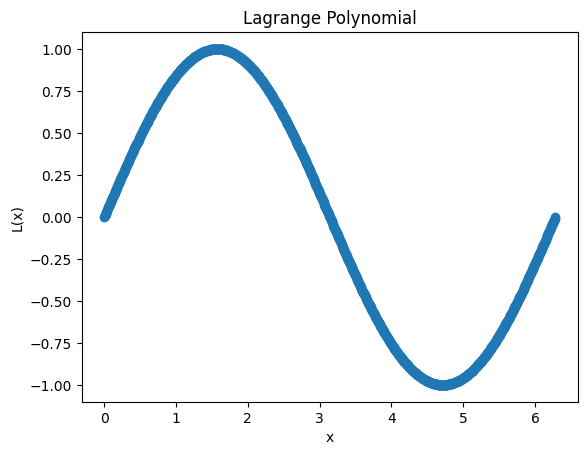

In [28]:
# version 2
import numpy as np
from scipy.interpolate import lagrange 
import matplotlib.pyplot as plt

# create interval 
a = 0
b = 2 * np.pi
n = 100

# create training set
err = np.random.normal(0, 50, size=n)
x_train = np.random.uniform(a,b,size=n) + err
y_train = np.sin(x_train)

# build lagrange polynomial 
lag_poly = lagrange(x_train, y_train)

# Generate a test set using the same distribution as your test(train??) set
x_test = np.random.uniform(a,b,n)
y_test = np.sin(x_test)

# Compute and report the resulting model’s train and test error
model_y_train = lag_poly(x_train)
model_y_test = lag_poly(x_test)

train_error = np.log(np.sqrt(np.sum((model_y_train - y_train)**2)))
test_error = np.log(np.sqrt(np.sum((model_y_test - y_test)**2)))
print(train_error)
print(test_error)

# plot polynomial
xx = np.linspace(0,6.28,1000)
yy = lag_poly(xx)
plt.scatter(xx, yy)
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.show()



In [15]:
# Repeat the experiment with zero-mean Gaussian noise ε added to x. Vary the standard deviation for ε and report your findings.
#std_dev = [0.01, 0.05, 0.07, 0.1, 0.5, 1.0, 2.0, 5, 10]
std_dev = np.linspace(0,10,20)

train_errors = []
test_errors = []

for sd in std_dev:
    # create training set
    err = np.random.normal(0, sd, size=n)
    x_train = np.random.uniform(a,b,size=n) + err
    y_train = np.sin(x_train)
    
    # build lagrange polynomial
    lag_poly = lagrange(x_train, y_train)

    # keep the same test set. Don't create a new one.

    # compute and report the resulting model's train and test error
    model_y_train = lag_poly(x_train)
    model_y_test = lag_poly(x_test)

    train_error = np.log(np.sqrt(np.sum((model_y_train - y_train)**2)))
    test_error = np.log(np.sqrt(np.sum((model_y_test - y_test)**2)))

    train_errors.append(train_error)
    test_errors.append(test_error)

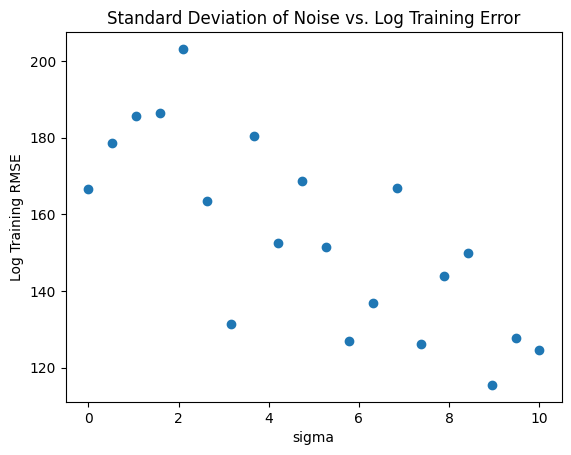

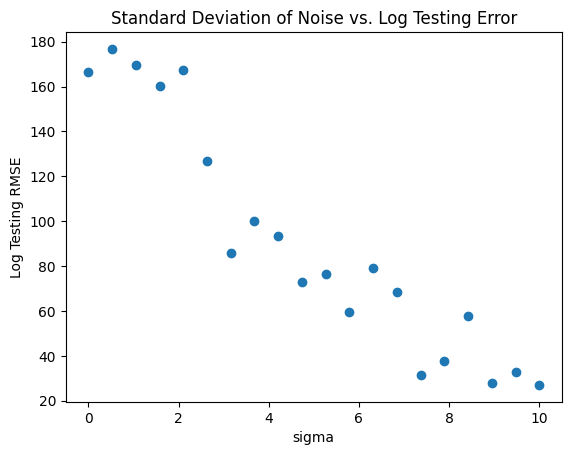

In [16]:
# plot training errors
plt.scatter(std_dev, train_errors)
plt.title('Standard Deviation of Noise vs. Log Training Error')
plt.xlabel('sigma')
plt.ylabel('Log Training RMSE')
plt.show()

# plot testing errors 
plt.scatter(std_dev, test_errors)
plt.title('Standard Deviation of Noise vs. Log Testing Error')
plt.xlabel('sigma')
plt.ylabel('Log Testing RMSE')
plt.show()